### Personality Prediction
#### Group 54
#### EG/2020/4038 Kuruwitaarachchi K.A.D.T.T.
#### EG/2020/4050 Madhumali W.H.

<img src= "image2.jpg" style="width:900px"/>

# IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
import string
import re
import nltk
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score





In [2]:
# laod the data file
data = pd.read_csv('mbti_clean_train.csv',encoding='latin1')

In [3]:
#get the no of data points and columns
data.shape


(8675, 3)

In [4]:
#columns of the dataset
data.columns



Index(['Unnamed: 0', 'type', 'posts'], dtype='object')

In [5]:
len(data)

8675

In [6]:
# show first five datapoints
data.head()

,Unnamed: 0,type,posts
0,0,INFJ,http www tube com watch v qsxhcwekrw http medi...
1,1,ENTP,im find lack post alarm sex bore posit often e...
2,2,INTP,good one http www youtub com watch v fhigbolff...
3,3,INTJ,dear enjoy convers day esoter gab natur univer...
4,4,ENTJ,fire anoth silli misconcept approach logic go ...


In [7]:
data.index

RangeIndex(start=0, stop=8675, step=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8675 non-null   int64 
 1   type        8675 non-null   object
 2   posts       8675 non-null   object
dtypes: int64(1), object(2)
memory usage: 203.4+ KB


In [9]:
data.describe()

,Unnamed: 0
count,8675.000000
mean,4337.000000
std,2504.401126
min,0.000000
25%,2168.500000
50%,4337.000000
75%,6505.500000
max,8674.000000


In [10]:
data.columns

Index(['Unnamed: 0', 'type', 'posts'], dtype='object')

In [11]:
#show the labels of the dataset
labels = data['type'].unique()
print("Unique Labels:", labels)

Unique Labels: ['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


In [12]:
#find the duplicate rows
duplicate_rows = data[data.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


c:\Users\RPT\anaconda3\envs\ml_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\RPT\anaconda3\envs\ml_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\RPT\anaconda3\envs\ml_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


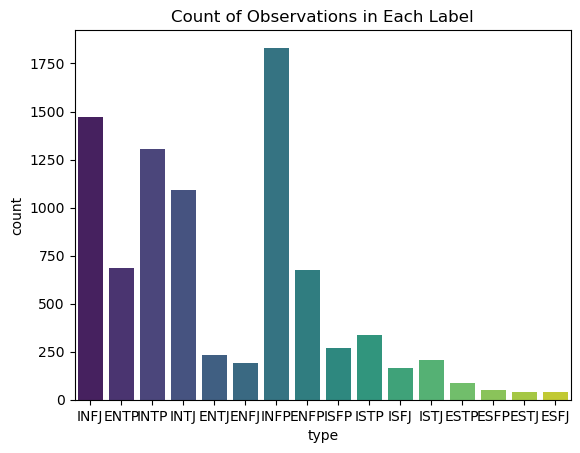

In [13]:
#plot the count of each label
sns.countplot(x='type', data=data, palette='viridis')
plt.title('Count of Observations in Each Label')
plt.show()


# Data Preprocessing

### Missing values

<Axes: >

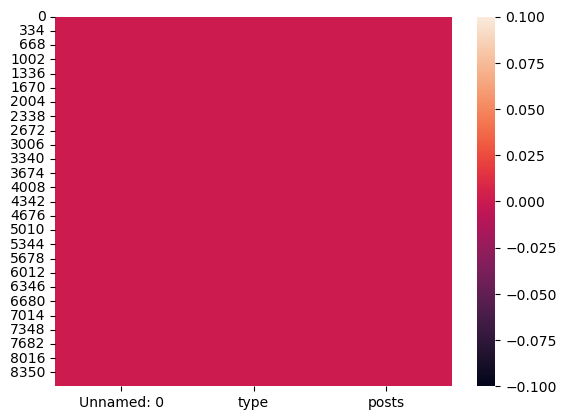

In [14]:
sns.heatmap(data=data.isnull())


### Text Pre-processing



In [15]:
import re
import string

##### convert uppercase to lowercase

In [16]:
data['posts'] = data['posts'].str.lower()
data.head()

,Unnamed: 0,type,posts
0,0,INFJ,http www tube com watch v qsxhcwekrw http medi...
1,1,ENTP,im find lack post alarm sex bore posit often e...
2,2,INTP,good one http www youtub com watch v fhigbolff...
3,3,INTJ,dear enjoy convers day esoter gab natur univer...
4,4,ENTJ,fire anoth silli misconcept approach logic go ...


##### Remove links

In [17]:

def remove_links(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

data['posts'] = data['posts'].apply(remove_links)

#print first five data
print(data.head())

   Unnamed: 0  type                                              posts
0           0  INFJ  http www tube com watch v qsxhcwekrw http medi...
1           1  ENTP  im find lack post alarm sex bore posit often e...
2           2  INTP  good one http www youtub com watch v fhigbolff...
3           3  INTJ  dear enjoy convers day esoter gab natur univer...
4           4  ENTJ  fire anoth silli misconcept approach logic go ...


##### Remove punctuations

In [18]:
import string
# remove pancuations marks
def remove_punctuation_and_specific_chars(text):
    text_without_punctuation = text.translate(str.maketrans('', '', string.punctuation))
    text_without_specific_chars = text_without_punctuation.replace('^', '~')

    return text_without_specific_chars

data['posts'] = data['posts'].apply(remove_punctuation_and_specific_chars)

#print first data
print(data.head())


   Unnamed: 0  type                                              posts
0           0  INFJ  http www tube com watch v qsxhcwekrw http medi...
1           1  ENTP  im find lack post alarm sex bore posit often e...
2           2  INTP  good one http www youtub com watch v fhigbolff...
3           3  INTJ  dear enjoy convers day esoter gab natur univer...
4           4  ENTJ  fire anoth silli misconcept approach logic go ...


##### Remove numbers

In [19]:
def remove_numbers(text):
    return ''.join(char for char in text if not char.isdigit())


data['posts'] = data['posts'].apply(remove_numbers)


print(data.tail())


      Unnamed: 0  type                                              posts
8670        8670  ISFP  http www youtub com watch v tedhbh ixfp alway ...
8671        8671  ENFP  thread alreadi exist someplac els doe http per...
8672        8672  INTP  mani question thing would take purpl pill pick...
8673        8673  INFP  conflict right come want child honest matern i...
8674        8674  INFP  long sinc personalitycaf although doesnt seem ...


##### Remove stopwords

In [20]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RPT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
#remove meaningless words and the single lettes
stop_words = set(stopwords.words('english'))

# Custom list of additional meaningless words
custom_meaningless_words = ['ye', 'im', 'http', 'www','etc','tube','com','ive','el','sp']  

def remove_stopwords_and_meaningless_words(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if len(word) > 1 and word.lower() not in stop_words and word.lower() not in custom_meaningless_words]
    return ' '.join(filtered_words)

data['posts'] = data['posts'].apply(remove_stopwords_and_meaningless_words)

print(data.sample(10))

      Unnamed: 0  type                                              posts
6301        6301  INFP  mean honest experienc way mani time peopl exit...
1078        1078  INFP  think lost comfort level post pc bit guess tim...
4185        4185  INFP  would even love lead life far away societi woo...
2602        2602  INTJ  would describ like think wing pure behavior se...
6248        6248  INFJ  lol youknowyoucar wp content upload antoin dod...
4904        4904  ENTP  wasnt passiv aggress genuin think cute genuin ...
7608        7608  INTP  actual type introvert extrovert intuit sens th...
6679        6679  ENTP  mad man crush guy mild success mayor newark ki...
7629        7629  INFP  also two trityp lean slight toward though feel...
1628        1628  INFP  true alway feel reliev spend hour artist proje...


##### Stemming

In [22]:
#import libaries
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Create a PorterStemmer
porter_stemmer = PorterStemmer()

# Function to apply stemming
def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [porter_stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

data['posts'] = data['posts'].apply(stem_text)

# Print the updated DataFrame
print(data.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RPT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


   Unnamed: 0  type                                              posts
0           0  INFJ  watch qsxhcwekrw medium tumblr tumblrlfouypmaq...
1           1  ENTP  find lack post alarm sex bore posit often exam...
2           2  INTP  good one youtub watch fhigbolffgw cour say kno...
3           3  INTJ  dear enjoy conver day esot gab natur univ idea...
4           4  ENTJ  fire anoth silli misconcept approach logic go ...


#### Building vocabulary

In [23]:
#create a vocabulary
from collections import Counter
vocab= Counter()

In [24]:
for sentence in data ['posts']:
    vocab.update(sentence.split())

In [25]:
vocab

Counter({'like': 75863,
         'think': 58163,
         'dont': 52368,
         'peopl': 47881,
         'one': 39962,
         'know': 39337,
         'get': 38647,
         'feel': 37037,
         'realli': 34950,
         'would': 34514,
         'thing': 34348,
         'time': 33608,
         'go': 29941,
         'make': 27432,
         'say': 27086,
         'type': 26735,
         'person': 26271,
         'want': 26145,
         'love': 24833,
         'well': 23375,
         'much': 22877,
         'friend': 22735,
         'watch': 22617,
         'way': 21628,
         'see': 21498,
         'good': 20942,
         'tri': 19628,
         'someth': 19430,
         'also': 18156,
         'lot': 18054,
         'use': 18030,
         'youtub': 17802,
         'even': 17107,
         'work': 16944,
         'alway': 16674,
         'life': 16424,
         'look': 16260,
         'someon': 16141,
         'find': 15785,
         'seem': 15716,
         'thank': 15198,
       

In [26]:
len(vocab)

98711

In [27]:
data.shape

(8675, 3)

#### prevent the overfit

In [28]:
#by using tokens we can avoid ovefitting, in here we are doing reduce the vocabulary and make datapoints larger than tokens
tokens = [key for key in vocab if vocab[key]>500]
tokens

['watch',
 'medium',
 'tumblr',
 'jpg',
 'moment',
 'youtub',
 'top',
 'ten',
 'play',
 'life',
 'chang',
 'experi',
 'repeat',
 'today',
 'may',
 'perc',
 'last',
 'thing',
 'friend',
 'post',
 'facebook',
 'commit',
 'suicid',
 'next',
 'day',
 'rest',
 'peac',
 'hello',
 'sorri',
 'hear',
 'natur',
 'relationship',
 'perfect',
 'time',
 'everi',
 'exist',
 'tri',
 'figur',
 'hard',
 'upload',
 'friendship',
 'boy',
 'girl',
 'wp',
 'content',
 'home',
 'design',
 'welcom',
 'stuff',
 'red',
 'master',
 'game',
 'set',
 'match',
 'least',
 'minut',
 'move',
 'dont',
 'mean',
 'sit',
 'mayb',
 'altern',
 'basic',
 'come',
 'three',
 'youv',
 'determin',
 'type',
 'want',
 'would',
 'like',
 'use',
 'given',
 'cognit',
 'function',
 'left',
 'ind',
 'video',
 'good',
 'one',
 'note',
 'somewhat',
 'subject',
 'complet',
 'death',
 'dear',
 'favorit',
 'grow',
 'current',
 'cool',
 'appear',
 'late',
 'sad',
 'someon',
 'everyon',
 'wait',
 'thought',
 'confid',
 'within',
 'inner',
 'w

In [29]:
len(tokens)

1498

In [30]:
#save the vocabulary
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename,'w', encoding='utf-8')
    file.write(data)
    file.close()

save_vocabulary(tokens, 'vocabulary.txt')    

### Divide Dataset(splitting)

In [31]:
x= data['posts']
y= data['type']

In [32]:
from sklearn.model_selection import train_test_split

#divide the dataset into training and testion, we are devided the data set in to 20% for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (6940,) (6940,)
Test set: (1735,) (1735,)


In [33]:

X_train.head()

4432    damn desir en wikipedia org wiki anthonythegre...
6733    hello peopl personalitycaf havent long time fe...
3458    plea sticki thread valu self evid alright than...
2469    love languag word affirm like talk lot text pe...
1284    live near seattl north move back week ago orig...
Name: posts, dtype: object

In [34]:
#show first five datas in training label set
y_train.head()

4432    INTP
6733    INFP
3458    INFJ
2469    ENFP
1284    INFJ
Name: type, dtype: object

### Vectorization

In [35]:

#change the test values to numarical values as matrix
def vectorizer(ds, vocabulary):
    vectorized_list = []

    vocabulary_set = set(vocabulary)

    for sentence in ds:
        sentence_list = [1 if word in sentence else 0 for word in vocabulary]
        vectorized_list.append(sentence_list)

    vectorized_list_new = numpy.asarray(vectorized_list, dtype=numpy.float32)

    return vectorized_list_new

In [36]:
vectorized_x_train = vectorizer(X_train, tokens)


In [37]:
total_elements = vectorized_x_train.size
non_zero_count = numpy.count_nonzero(vectorized_x_train)
zero_count = total_elements - non_zero_count

print("Total Elements:", total_elements)
print("Non-Zero Count:", non_zero_count)
print("Zero Count:", zero_count) 


Total Elements: 10396120
Non-Zero Count: 2648589
Zero Count: 7747531


In [38]:
vectorized_x_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
vectorized_x_test = vectorizer(X_test, tokens)

#### Vectorization of labels

In [40]:
# labelization
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
vectorized_y_train = label_binarizer.fit_transform(y_train)

vectorized_y_test = label_binarizer.transform(y_test)


In [41]:
print(vectorized_y_train.shape)


(6940, 16)


In [43]:
y_train.value_counts()

type
INFP    1438
INFJ    1205
INTP    1040
INTJ     882
ENTP     551
ENFP     534
ISTP     270
ISFP     206
ENTJ     182
ENFJ     166
ISTJ     166
ISFJ     131
ESTP      72
ESFP      36
ESFJ      33
ESTJ      28
Name: count, dtype: int64

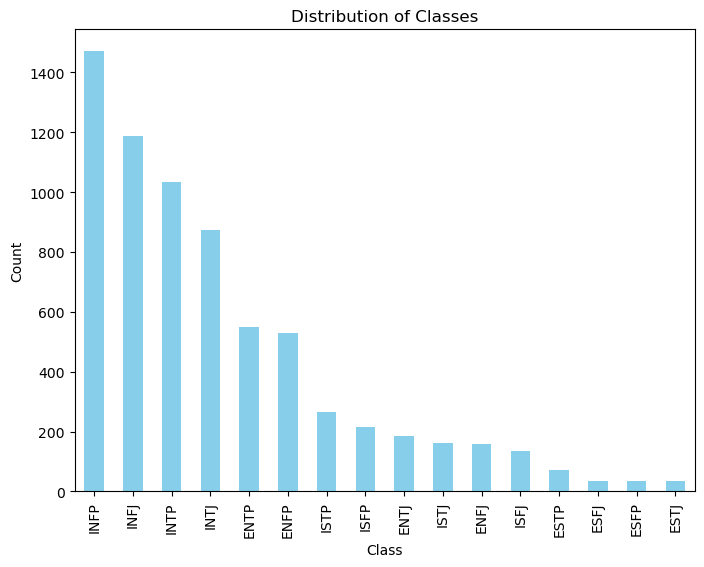

In [42]:
class_counts = y_train.value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


### Handle imbalanced dataset

In [43]:
!pip install imbalanced-learn;

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
# get the train vectorized data
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)



(23520, 1498) (23520,)


In [45]:
y_train_smote.value_counts()

type
INTP    1470
INFP    1470
INFJ    1470
ENFP    1470
ENTP    1470
INTJ    1470
ISFP    1470
ISTJ    1470
ISTP    1470
ISFJ    1470
ENTJ    1470
ENFJ    1470
ESTP    1470
ESFJ    1470
ESTJ    1470
ESFP    1470
Name: count, dtype: int64

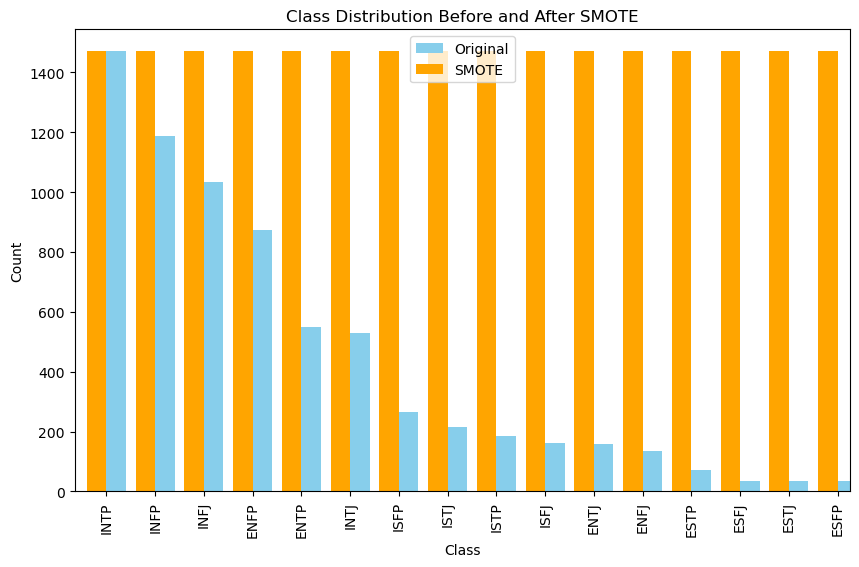

In [46]:
# Count the occurrences of each class in the original y_train
class_counts_original = y_train.value_counts()
# Count the occurrences of each class in the y_train_smote
class_counts_smote = y_train_smote.value_counts()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
class_counts_original.plot(kind='bar', color='skyblue', ax=ax, position=0, width=0.4, label='Original')
class_counts_smote.plot(kind='bar', color='orange', ax=ax, position=1, width=0.4, label='SMOTE')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Class Distribution Before and After SMOTE')
ax.legend()

plt.show()


In [47]:
vectorized_x_train_smote

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.1644804 , ..., 0.        , 0.        ,
        0.        ],
       [0.77578837, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.90082467, 0.        , 0.        , ..., 0.        , 0.90082467,
        0.        ]], dtype=float32)

In [48]:
vectorized_x_train_smote.shape

(23520, 1498)

In [49]:
y_train_smote

0        INTP
1        INFP
2        INFJ
3        ENFP
4        INFJ
         ... 
23515    ISTP
23516    ISTP
23517    ISTP
23518    ISTP
23519    ISTP
Name: type, Length: 23520, dtype: object

In [50]:
vectorized_x_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
y_test

7311    INTP
4200    INFP
6755    ISTJ
2610    ENFJ
2093    INTP
        ... 
6919    INFP
8051    INTJ
3052    ESTP
6280    ISFP
3900    INTJ
Name: type, Length: 1735, dtype: object

In [52]:
vectorized_y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### model training and evaluation   

In [53]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    print("Actual values:", y_act)
    print("Predicted values:", y_pred)

    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred, average='weighted'), 3)
    rec = round(recall_score(y_act, y_pred, average='weighted'), 3)
    f1 = round(f1_score(y_act, y_pred, average='weighted'), 3)

    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1.Score = {f1}')


### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

lr= LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote);


c:\Users\RPT\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [56]:
y_train_pred

array(['INFJ', 'INFP', 'INFJ', ..., 'ISTP', 'ISTP', 'ISTP'], dtype=object)

In [57]:
training_scores(y_train_smote, y_train_pred)

Actual values: 0        INTP
1        INFP
2        INFJ
3        ENFP
4        INFJ
         ... 
23515    ISTP
23516    ISTP
23517    ISTP
23518    ISTP
23519    ISTP
Name: type, Length: 23520, dtype: object
Predicted values: ['INFJ' 'INFP' 'INFJ' ... 'ISTP' 'ISTP' 'ISTP']
Training Scores:
	Accuracy = 0.954
	Precision = 0.954
	Recall = 0.954
	F1.Score = 0.954


#### Cross validation of Logistic Regression

In [58]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Standardize the features
scaler = StandardScaler()
vectorized_x_train_scaled = scaler.fit_transform(vectorized_x_train_smote)




In [59]:
# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(lr, vectorized_x_train_scaled, y_train_smote, cv=5, scoring='accuracy')









In [60]:
# Print the cross-validation accuracy scores
print("Cross-validation accuracy scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation accuracy scores: [0.78890306 0.80484694 0.8494898  0.89689626 0.95939626]
Mean accuracy: 0.8599064625850341


In [61]:
# Perform cross-validation predictions
y_pred = cross_val_predict(lr, vectorized_x_train_scaled, y_train_smote, cv=5)

In [62]:
# Calculate precision, recall, and f1-score
precision = precision_score(y_train_smote, y_pred, average='weighted')
recall = recall_score(y_train_smote, y_pred, average='weighted')
f1 = f1_score(y_train_smote, y_pred, average='weighted')

# Print precision, recall, and f1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.8497219454237079
Recall: 0.859906462585034
F1-score: 0.8536885844881902


#### Cofusion Matrix for Logistic regression

In [63]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train_smote, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1454    4    0    1    0    0    0    0    1    5    2    1    2    0
     0    0]
 [  10 1256    1   31    0    1    0    1   40   67   20   23    2   11
     4    3]
 [   2    0 1451    1    0    0    0    0    7    3    2    3    0    1
     0    0]
 [   3   19   14 1243    0    0    0    3   29   32   42   57    3    6
     4   15]
 [   0    0    0    0 1470    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0 1470    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0 1470    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0 1470    0    0    0    0    0    0
     0    0]
 [  31   96   22   58    1    1    0    2  715  258  107   93   14   26
    23   23]
 [  39  132   12   57    1    0    0    2  339  545  103  141   23   35
    17   24]
 [   6   37   27   69    0    0    2    3   84   53  992  145    3    6
    14   29]
 [   4   34   22  105    0    0    0    3   90 

In [64]:
true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_positive = conf_matrix[1, 1]

print("True Negative:", true_negative)
print("False Positive:", false_positive)
print("False Negative:", false_negative)
print("True Positive:", true_positive)

True Negative: 1454
False Positive: 4
False Negative: 10
True Positive: 1256


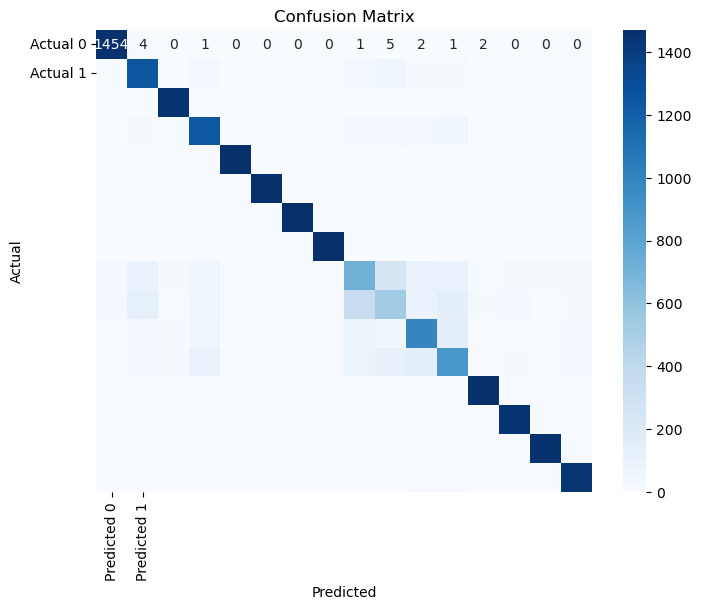

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Naive Bayes Algorithm

In [66]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)


In [67]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)


In [68]:
nb_model = MultinomialNB()
nb_model.fit(vectorized_x_train_smote, y_train_smote);


In [69]:
y_test_pred = nb_model.predict(vectorized_x_test)


In [70]:
def evaluation_scores(y_actual, y_predicted):
    acc = accuracy_score(y_actual, y_predicted)
    pr = precision_score(y_actual, y_predicted, average='weighted')
    rec = recall_score(y_actual, y_predicted, average='weighted')
    f1 = f1_score(y_actual, y_predicted, average='weighted')

    print(f'Accuracy: {acc:.3f}')
    print(f'Precision: {pr:.3f}')
    print(f'Recall: {rec:.3f}')
    print(f'F1 Score: {f1:.3f}')

# Call the function with your actual and predicted labels
evaluation_scores(y_test, y_test_pred)


Accuracy: 0.308
Precision: 0.308
Recall: 0.308
F1 Score: 0.306


c:\Users\RPT\anaconda3\envs\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Cross validation for Naive Bayes

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()

# Perform cross-validation
cv_scores_nb = cross_val_score(nb_model, vectorized_x_train_smote, y_train_smote, cv=5)  # You can adjust the number of folds (cv) as needed

# Print the cross-validation scores
print("Cross-validation scores (Naive Bayes):", cv_scores_nb)
print("Mean accuracy:", cv_scores_nb.mean())

Cross-validation scores (Naive Bayes): [0.53869048 0.6547619  0.69642857 0.70046769 0.69770408]
Mean accuracy: 0.657610544217687


In [72]:
y_pred_nb = cross_val_predict(nb_model, vectorized_x_train_smote, y_train_smote, cv=5)
conf_matrix_nb = confusion_matrix(y_train_smote, y_pred_nb)

# Print the confusion matrix
print("Confusion Matrix (Naive Bayes):")
print(conf_matrix_nb)

Confusion Matrix (Naive Bayes):
[[1085   27   15   36    0    0    0    0  134   78   51   24    9    6
     0    5]
 [  40  811   30   78    0    0    0    2  166  156   47   40   17   53
     3   27]
 [   1   28 1073   45    0    0    0    0   68   30  146   68    0    1
     2    8]
 [   9   75   36  812    0    7    3   11   72   61  139  164    2   19
     3   57]
 [   0   60    0   10 1286    0    0    0   64   14   22    2    7    0
     0    5]
 [   6   21    3   76    0 1274    0    0   14   25   14    7   15   10
     0    5]
 [   0   17   20   12    0    0 1277    0   28   16   53   41    0    0
     0    6]
 [   2    3   11   84    0    0    0 1229   21   13   46   36    0    0
     0   25]
 [  52  158   36   75    9    2    0    3  465  326  145   64   16   65
    21   33]
 [  27  140   14   49    2    2    1    4  263  652   70  104   19   70
    12   41]
 [  22   56   58   90    0    8    0   12   83   89  656  226   20   40
    34   76]
 [   7   61   35  113    0    0  

In [73]:
true_negative_nb = conf_matrix_nb[0, 0]
false_positive_nb = conf_matrix_nb[0, 1]
false_negative_nb = conf_matrix_nb[1, 0]
true_positive_nb = conf_matrix_nb[1, 1]

# Print the values
print("True Negative (Naive Bayes):", true_negative_nb)
print("False Positive (Naive Bayes):", false_positive_nb)
print("False Negative (Naive Bayes):", false_negative_nb)
print("True Positive (Naive Bayes):", true_positive_nb)

True Negative (Naive Bayes): 1085
False Positive (Naive Bayes): 27
False Negative (Naive Bayes): 40
True Positive (Naive Bayes): 811


### compare the two models accuracy before the validation

c:\Users\RPT\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


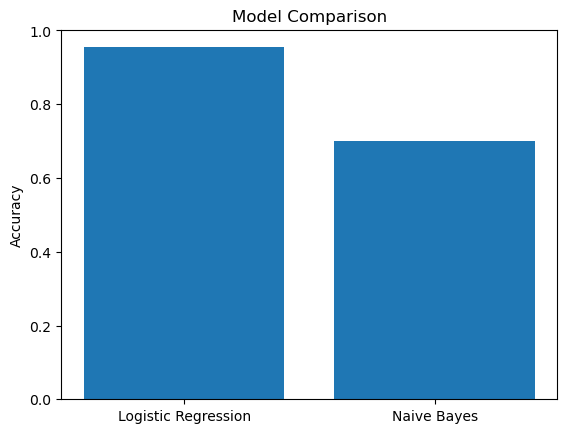

In [74]:
import matplotlib.pyplot as plt
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)
nb = MultinomialNB()
nb.fit(vectorized_x_train_smote, y_train_smote)
y_train_pred_lr = lr.predict(vectorized_x_train_smote)
y_train_pred_nb = nb.predict(vectorized_x_train_smote)

accuracy_lr = accuracy_score(y_train_smote, y_train_pred_lr)
accuracy_nb = accuracy_score(y_train_smote, y_train_pred_nb)

labels = ['Logistic Regression', 'Naive Bayes']
accuracies = [accuracy_lr, accuracy_nb]

plt.bar(labels, accuracies)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()


### compare the two models accuracy after the validation

c:\Users\RPT\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\RPT\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

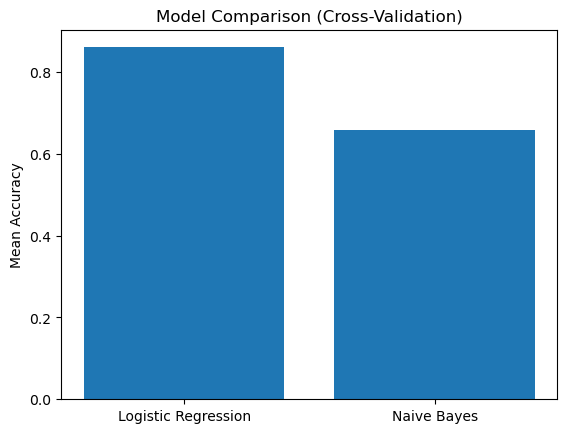

In [75]:
import matplotlib.pyplot as plt
cv_scores = cross_val_score(lr, vectorized_x_train_scaled, y_train_smote, cv=5)
cv_scores_nb = cross_val_score(nb_model, vectorized_x_train_smote, y_train_smote, cv=5)

# Plotting the comparison
labels = ['Logistic Regression', 'Naive Bayes']
scores = [cv_scores.mean(), cv_scores_nb.mean()]

plt.bar(labels, scores)
plt.ylabel('Mean Accuracy')
plt.title('Model Comparison (Cross-Validation)')
plt.show()
